# **Sentiment Analysis of IMDB Movie Reviews**

</br>

**Dataset**
</br>

The IMDb Dataset of 50K Movie Reviews, is a popular dataset commonly used for sentiment analysis and natural language processing tasks. The dataset consists of 50,000 movie reviews, with 25,000 reviews labeled as positive and 25,000 as negative
</br>

Dataset Source: [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?datasetId=134715&searchQuery=pytor)
</br>

**The Problem Statement**
</br>

Predict the number of positive and negative reviews based on sentiments by using deep learning techniques.

**To approach this problem, we've followed the below outline:**

- **Data preprocessing:** We'ce started by preprocessing the IMDb dataset of 50K Movie Reviews (cleaning the text data, removing any irrelevant characters, converting the text to lowercase, and splitting it into individual words or tokens, removing stop words, performing stemming or lemmatization)

- **Word embedding:** We've converted the preprocessed text into a numerical representation that can be understood by deep learning models, using word embeddings, such as Word2Vec or GloVe, to represent words as dense vectors in a continuous vector space.

- **Model selection:** Choose a suitable deep learning model architecture including recurrent neural networks (RNNs), long short-term memory (LSTM) networks, and convolutional neural networks (CNNs). 

- **Model training:** Split our dataset into training and validation sets.

- **Model evaluation**

- **Model refinement**


**(Initial) Attributes**:

* Review
* Sentiment



## All the imports

In [1]:
# import to "ignore" warnings

import warnings
warnings.filterwarnings('ignore')

# imports for data manipulation

import pandas as pd
import numpy as np

# imports for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # need local import


# import for regular expressions

import re 

# import Natural Language Toolkit (NLTK) for natural language processing || need local import

import nltk 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from collections import Counter

# import pytorch (framework for building deep learning models) || need local import

import torch 
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# imports from sklearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stavp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\stavp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load the csv file 

In [2]:
# read data

reviews_data = pd.read_csv('IMDB Dataset.csv')
reviews_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Overview of the dataset

In [3]:
# dimensions of the dataset

a = len(reviews_data)
b = len(reviews_data.columns)

print(f"The IMDB Movie Reviews Dataset has {a} instances and {b} Features.")

The IMDB Movie Reviews Dataset has 50000 instances and 2 Features.


In [4]:
# search for missing values

colnames=reviews_data.columns
df=pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal", "Type"])
for cn in colnames:
    df=df.append({"Column" : cn,
                "NumOfMissingVal": sum(pd.isna(reviews_data[cn])),
                "UniqueVal":len(reviews_data[cn].unique()),
                "Type" : reviews_data[cn].dtypes},
               ignore_index=True)

df

,Column,NumOfMissingVal,UniqueVal,Type
0,review,0,49582,object
1,sentiment,0,2,object


positive    25000
negative    25000
Name: sentiment, dtype: int64


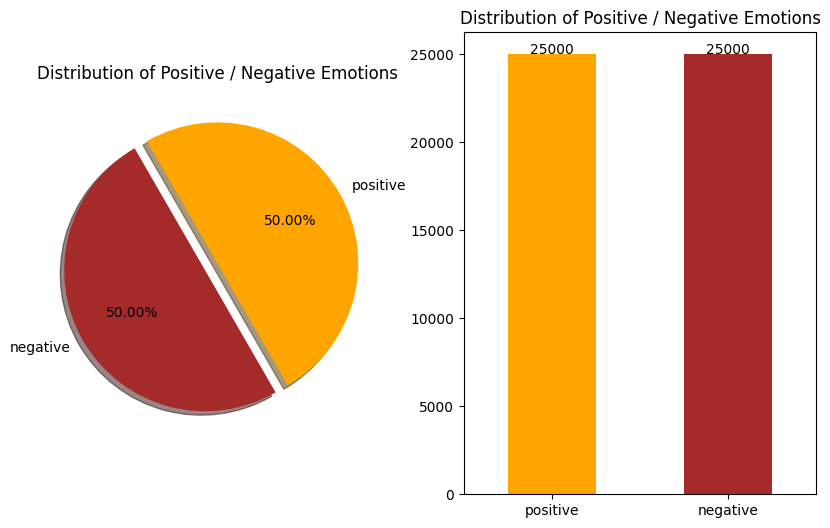

In [5]:
# print the count of the values of label feature

print(reviews_data['sentiment'].value_counts())

# plot the sentiment feature

a , ax = plt.subplots(1,2,figsize = (10,6))
colors = ["orange", "brown"]

reviews_data['sentiment'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%',
                                                  ax = ax[0], shadow = True, 
                                                  startangle=300, 
                                                  colors = colors )

ax[0].set_title('Distribution of Positive / Negative Emotions')
ax[0].set_ylabel('')

reviews_data['sentiment'].value_counts().plot(kind='bar', ax=ax[1], color=colors)

ax[1].set_title('Distribution of Positive / Negative Emotions')

# Rotate the x-axis tick labels to be horizontal

ax[1].tick_params(axis='x', rotation=0)

# Add labels inside the bars

counts = reviews_data['sentiment'].value_counts()
for i, count in enumerate(counts):
    ax[1].text(i, count, str(count), ha='center', va='baseline')

plt.show()

# Here we got balance dataset with 25K for each labels

In [6]:
# Check if there are duplicated values

duplicates = reviews_data[reviews_data.duplicated()]

print(f'Number of duplicate rows: {len(duplicates)}')

# so, let's remove the duplicated values
reviews_data.drop_duplicates(inplace=True)

# dimensions of the dataset

a = len(reviews_data)
b = len(reviews_data.columns)

print(f"The IMDB Movie Reviews Dataset has {a} instances and {b} Features.")

Number of duplicate rows: 418
The IMDB Movie Reviews Dataset has 49582 instances and 2 Features.


positive    24884
negative    24698
Name: sentiment, dtype: int64


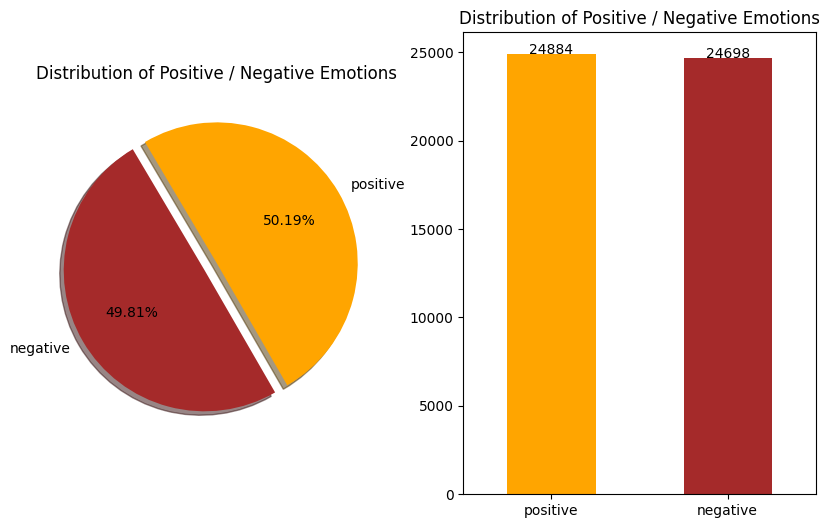

In [7]:
# print the count of the values of label feature

print(reviews_data['sentiment'].value_counts())

# plot the sentiment feature

a , ax = plt.subplots(1,2,figsize = (10,6))
colors = ["orange", "brown"]

reviews_data['sentiment'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%',
                                                  ax = ax[0], shadow = True, 
                                                  startangle=300, 
                                                  colors = colors )

ax[0].set_title('Distribution of Positive / Negative Emotions')
ax[0].set_ylabel('')

reviews_data['sentiment'].value_counts().plot(kind='bar', ax=ax[1], color=colors)

ax[1].set_title('Distribution of Positive / Negative Emotions')

# Rotate the x-axis tick labels to be horizontal

ax[1].tick_params(axis='x', rotation=0)

# Add labels inside the bars

counts = reviews_data['sentiment'].value_counts()
for i, count in enumerate(counts):
    ax[1].text(i, count, str(count), ha='center', va='baseline')

plt.show()

## Exploratory data analysis(EDA) and Data Cleaning  

### Sentiment label transformation
As may be seen, we're dealing with a sentiment label in text format. So, in this situation, we need to transform these labels into binary numbers [0,1]
</br>

We will define:
* positive as 1  
* negative as 0


In [8]:
# if the sentiment feauture has the value "positive", then it takes 1
# if the sentiment feauture has the value "negative", then it takes 0

reviews_data['sentiment'].replace({'positive' : 1 , 'negative' : 0} , 
                                  inplace = True)

In [9]:
reviews_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Data preprocessing - remove HTML tags, Punctuations, Stop words and use Word stemming

* HTML tags, punctuations removal
 * Since HTML tags like "br />" and punctuation like "." are not English words and cannot be regarded as features, they should be removed from the original text. 

* Stop words removal
 * Stop words such as 'of' and 'was', are not useful and should also be removed to get rid of negative features.
 
* Word Stemming / Word Lemmatization
 * Stemming is a process of reducing words to their base or root form by removing suffixes
 * Lemmatization is a process of reducing words to their base or dictionary form, called lemmas.
 


In [10]:
# Before preprocessing

print('Before preprocessing:\n', reviews_data['review'][0])

Before preprocessing:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the

### Apply stemming 

After experimenting with various stemming algorithms, including:
- Porter, 
- Snowball, and 
- Lancaster, and evaluating their performance on the sentiment analysis task, we have conclude that while all the stemmers provided some level of word reduction and normalization, the Porter stemming algorithm stood out as the most suitable choice for my specific needs.

In [11]:
 # Get all the english stopwords

stopwords = set(nltk.corpus.stopwords.words('english'))

 # Initialize a porter stemmer to stem each word of the review dataset 

stemmer = nltk.porter.PorterStemmer()

 # Initialize corpus list to store all words in the dataset
    
corpus = []  

def preprocessing(data):
    data = re.sub(r"http\S+", " ", data)  # Remove hyperlinks from the text
    data = re.sub(r"<.*?>", " ", data)  # Remove HTML tags from the text
    punctuations = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'  # Define punctuation symbols
    data = re.sub(punctuations, ' ', data)  # Remove punctuation symbols from the text
    data = data.lower()  # Convert text to lowercase
    words = data.split()  # Split the text into individual words
    processed_words = []  # Initialize list to store processed words
    
    for word in words:
        if word not in stopwords:  # Check if the word is not a stopword
            word = stemmer.stem(word)  # Stem the word using Porter stemmer
            processed_words.append(word)  # Add the processed word to the list
            corpus.extend(processed_words)  # Add the processed word to the corpus list
    
    cleaned_sentence = " ".join(processed_words)  # Join the processed words to form a cleaned sentence
    return cleaned_sentence

exampl sentenc hyperlink html tag symbol like


In [12]:
# initialize an empty review list

review = []

# initialize a for loop so as to apply preprocessing steps 

for i in reviews_data['review']:
    review.append(preprocessing(i))
    
# assign the review list into data['review'] column

reviews_data['review'] = review

# After preprocessing

print('After preprocessing:\n', reviews_data['review'][0])

After preprocessing:
 one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get tou

### Apply lemmatization

The results obtained from lemmatization **did not meet our expectations** in terms of improving the overall performance of our sentiment analysis task. Despite the benefit of obtaining meaningful word forms, the impact on the final sentiment classification was not significant enough to outweigh the computational costs involved.

In [13]:
# # Get all the english stopwords

# stopwords = set(nltk.corpus.stopwords.words('english'))

# # Initialize WordNet lemmatizer

# lemmatizer = WordNetLemmatizer()  

# # Initialize corpus list to store all words in the dataset
    
# corpus = []  

# def get_simplified_pos(tag):
#     if tag.startswith('N'):
#         return 'n'  # Noun
#     elif tag.startswith('V'):
#         return 'v'  # Verb
#     elif tag.startswith('J'):
#         return 'a'  # Adjective
#     elif tag.startswith('R'):
#         return 'r'  # Adverb
#     else:
#         return None

# def preprocessing(data):
#     data = re.sub(r"http\S+", " ", data)  # Remove hyperlinks from the text
#     data = re.sub(r"<.*?>", " ", data)  # Remove HTML tags from the text
#     punctuations = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'  # Define punctuation symbols
#     data = re.sub(punctuations, ' ', data)  # Remove punctuation symbols from the text
#     data = data.lower()  # Convert text to lowercase
#     words = data.split()  # Split the text into individual words
#     processed_words = []  # Initialize list to store processed words
    
#     for word, tag in nltk.pos_tag(words):
#         if word not in stopwords:  # Check if the word is not a stopword
#             simplified_pos = get_simplified_pos(tag)  # Get simplified POS tag
#             if simplified_pos is not None:
#                 word = lemmatizer.lemmatize(word, pos=simplified_pos)  # Lemmatize the word using simplified POS
#             processed_words.append(word)  # Add the processed word to the list
#             corpus.extend(processed_words)  # Add the processed word to the corpus list
    
#     cleaned_sentence = " ".join(processed_words)  # Join the processed words to form a cleaned sentence
#     return cleaned_sentence

In [14]:
# # initialize an empty review list

# review = []

# # initialize a for loop so as to apply preprocessing steps 

# for i in reviews_data['review']:
#     review.append(preprocessing(i))
    
# # assign the review list into data['review'] column

# reviews_data['review'] = review

# # After preprocessing

# print('After preprocessing:\n', reviews_data['review'][0])

# After preprocessing - OUTPUT:
#  one reviewer mention watch 1 oz episode hook right exactly happen 
# first thing strike oz brutality unflinching scene violence set 
# right word go trust show faint hearted timid show pull punch 
# regard drug sex violence hardcore classic use word call oz nickname
# give oswald maximum security state penitentary focus mainly emerald 
# city experimental section prison cell glass front face inwards privacy 
# high agenda em city home many aryan muslim gangstas latinos christian 
# italian irish scuffles death stare dodgy dealing shady agreement never 
# far away would say main appeal show due fact go show dare forget pretty 
# picture paint mainstream audience forget charm forget romance oz mess 
# around first episode ever saw strike nasty surreal say ready watch 
# develop taste oz get accustom high level graphic violence violence 
# injustice crook guard sell nickel inmate kill order get away well 
# mannered middle class inmate turn prison bitch due lack street skill 
# prison experience watch oz may become comfortable uncomfortable view 
# thats get touch darker side

### Visualization of the reviews

#### Bar Plot of Top 20 Most Common Words with Count Labels

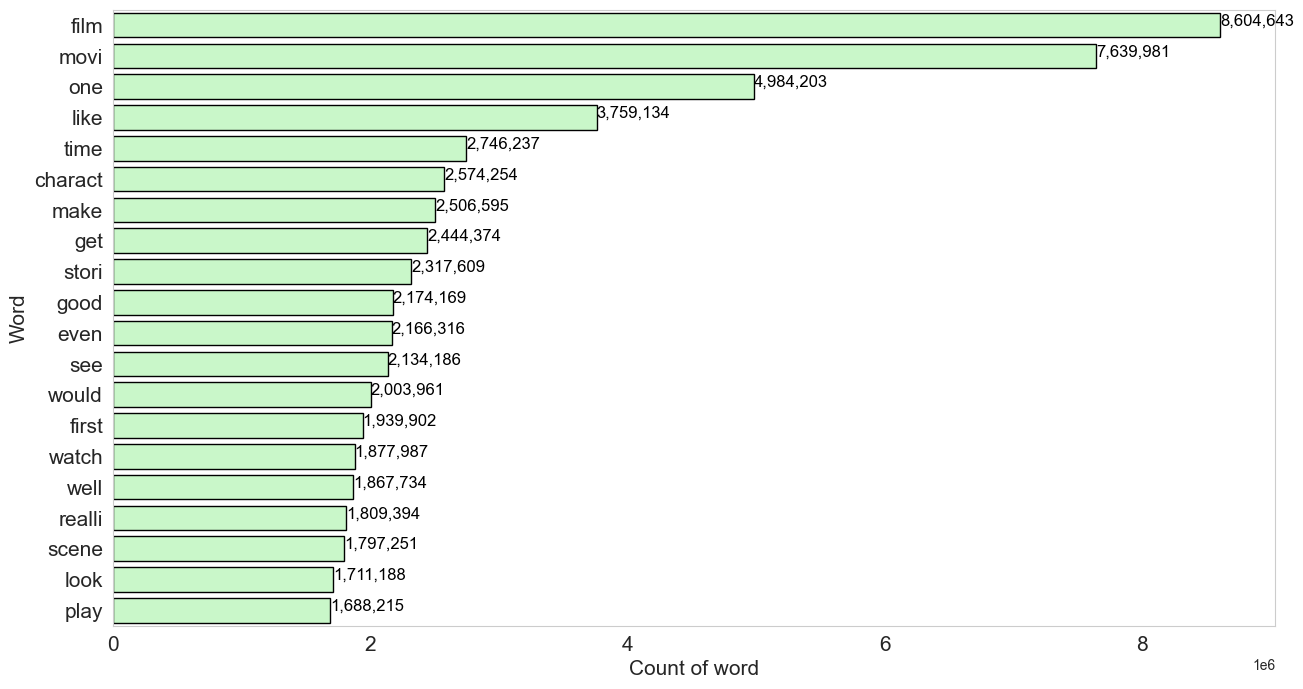

In [19]:
# Create a Counter object to count the occurrences of each word in the corpus
list_of_all_the_words = Counter(corpus)

# Get the top 20 most common words and store them in a dictionary
most_common_words = dict(list_of_all_the_words.most_common(20))

# Create a DataFrame to store the word and its count
freq = pd.DataFrame(columns=["Word", "Count of word"])
freq["Word"] = list(most_common_words.keys())
freq["Count of word"] = list(most_common_words.values())

# Create a new figure with the specified size
plt.figure(figsize=(15, 8))

# Set the label for the x-axis and y-axis with specified font size
plt.xlabel('Count of word', fontsize=15)
plt.ylabel('Word', fontsize=15)

# Set the font size for the x-axis and y-axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Set the seaborn style to "whitegrid" for aesthetic purposes
sns.set_style("whitegrid", {'axes.grid' : False})

# Create a bar plot using seaborn to visualize the word counts
sns.barplot(y='Word', x='Count of word', data=freq, color="#C1FFC1", edgecolor='black')

# Add count labels to the bars
for i, count in enumerate(freq["Count of word"]):
    plt.text(count, i, f"{count:,}", ha='left', va='baseline', fontsize=12, color='black')

# Display the plot
plt.show()

#### Distribution of the lengths (number of words) of the reviews

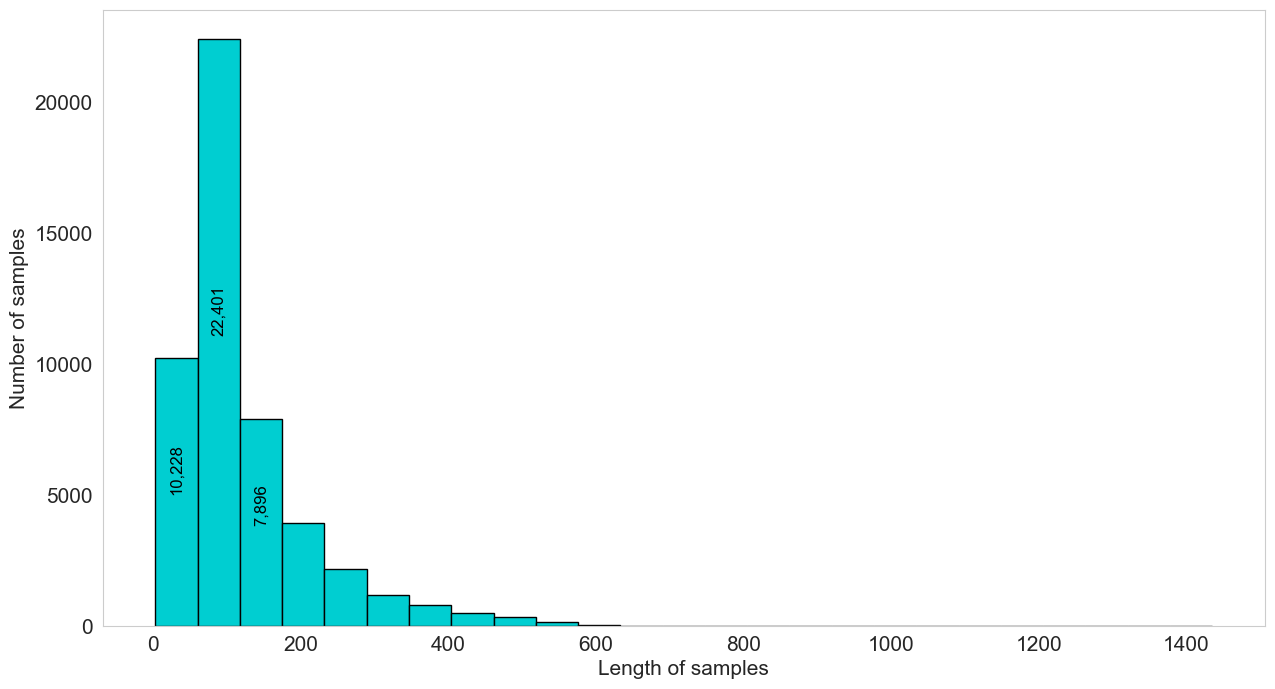

In [20]:
# Create an empty list to store the lengths of samples
lengths = []

# Iterate over each sample in the 'review' column of the 'data' DataFrame
for sample in list(reviews_data['review']):
    # Split the sample into individual words and calculate the length (number of words)
    lengths.append(len(sample.split()))

# Create a new figure with the specified size
plt.figure(figsize=(15, 8))

# Plot a histogram using the 'lengths' list with 25 bins
plt.hist(lengths, 25, color='darkturquoise', edgecolor='black')

# Set the label for the x-axis and y-axis with specified font size
plt.xlabel('Length of samples', fontsize=15)
plt.ylabel('Number of samples', fontsize=15)

# Set the font size for the x-axis and y-axis ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Set the seaborn style to "whitegrid" for aesthetic purposes
sns.set_style("whitegrid", {'axes.grid' : False})

# Add the count of total reviews to each bar
total_reviews = len(reviews_data['review'])
for i, rect in enumerate(plt.gca().patches[:3]):
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height / 2, f'{int(height):,}',
                   ha='center', va='baseline', fontsize=12, color='black', rotation='vertical')
# Display the plot
plt.show()

In [ ]:
plt.figure(figsize=(20,3))
for i,col in enumerate(numerical_feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=reviews_data,x=col,hue='label',bins=50)
    plt.title(f"Distribution of Various word counts with respect to target")
plt.tight_layout()
plt.show()

Positive Review Words:0        163
1         86
2         85
4        125
5         56
        ... 
49983     64
49985     99
49989     87
49992     87
49995     80
Name: review, Length: 24884, dtype: int64
Negative Review Words:3         66
7         83
8         64
10        50
11        84
        ... 
49994     59
49996     57
49997    113
49998    113
49999     66
Name: review, Length: 24698, dtype: int64


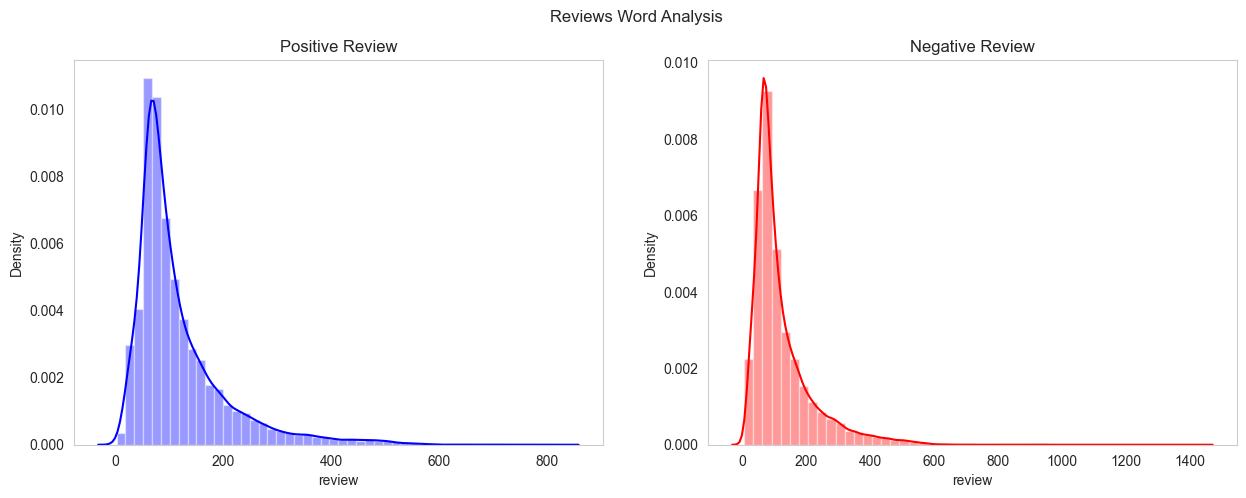

In [21]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    



count_good = reviews_data[reviews_data['sentiment'] == 1]
count_bad = reviews_data[reviews_data['sentiment'] == 0]

count_good_words=count_good['review'].str.split().apply(lambda reviews_data:cal_len(reviews_data))
count_bad_words=count_bad['review'].str.split().apply(lambda reviews_data:cal_len(reviews_data))

print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))

plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

### Split the review dataset

In [22]:
dataset_to_use = reviews_data.copy()

In [23]:
dataset_to_use

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job creativ origin fir...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,go disagre previou comment side maltin one sec...,0


In [39]:
X,y = dataset_to_use['review'].values, dataset_to_use['sentiment'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

print(f'Shape of train data: {X_train.shape}')
print(f'Shape of test data: {X_test.shape}')

Shape of train data: (34707,)
Shape of test data: (14875,)
